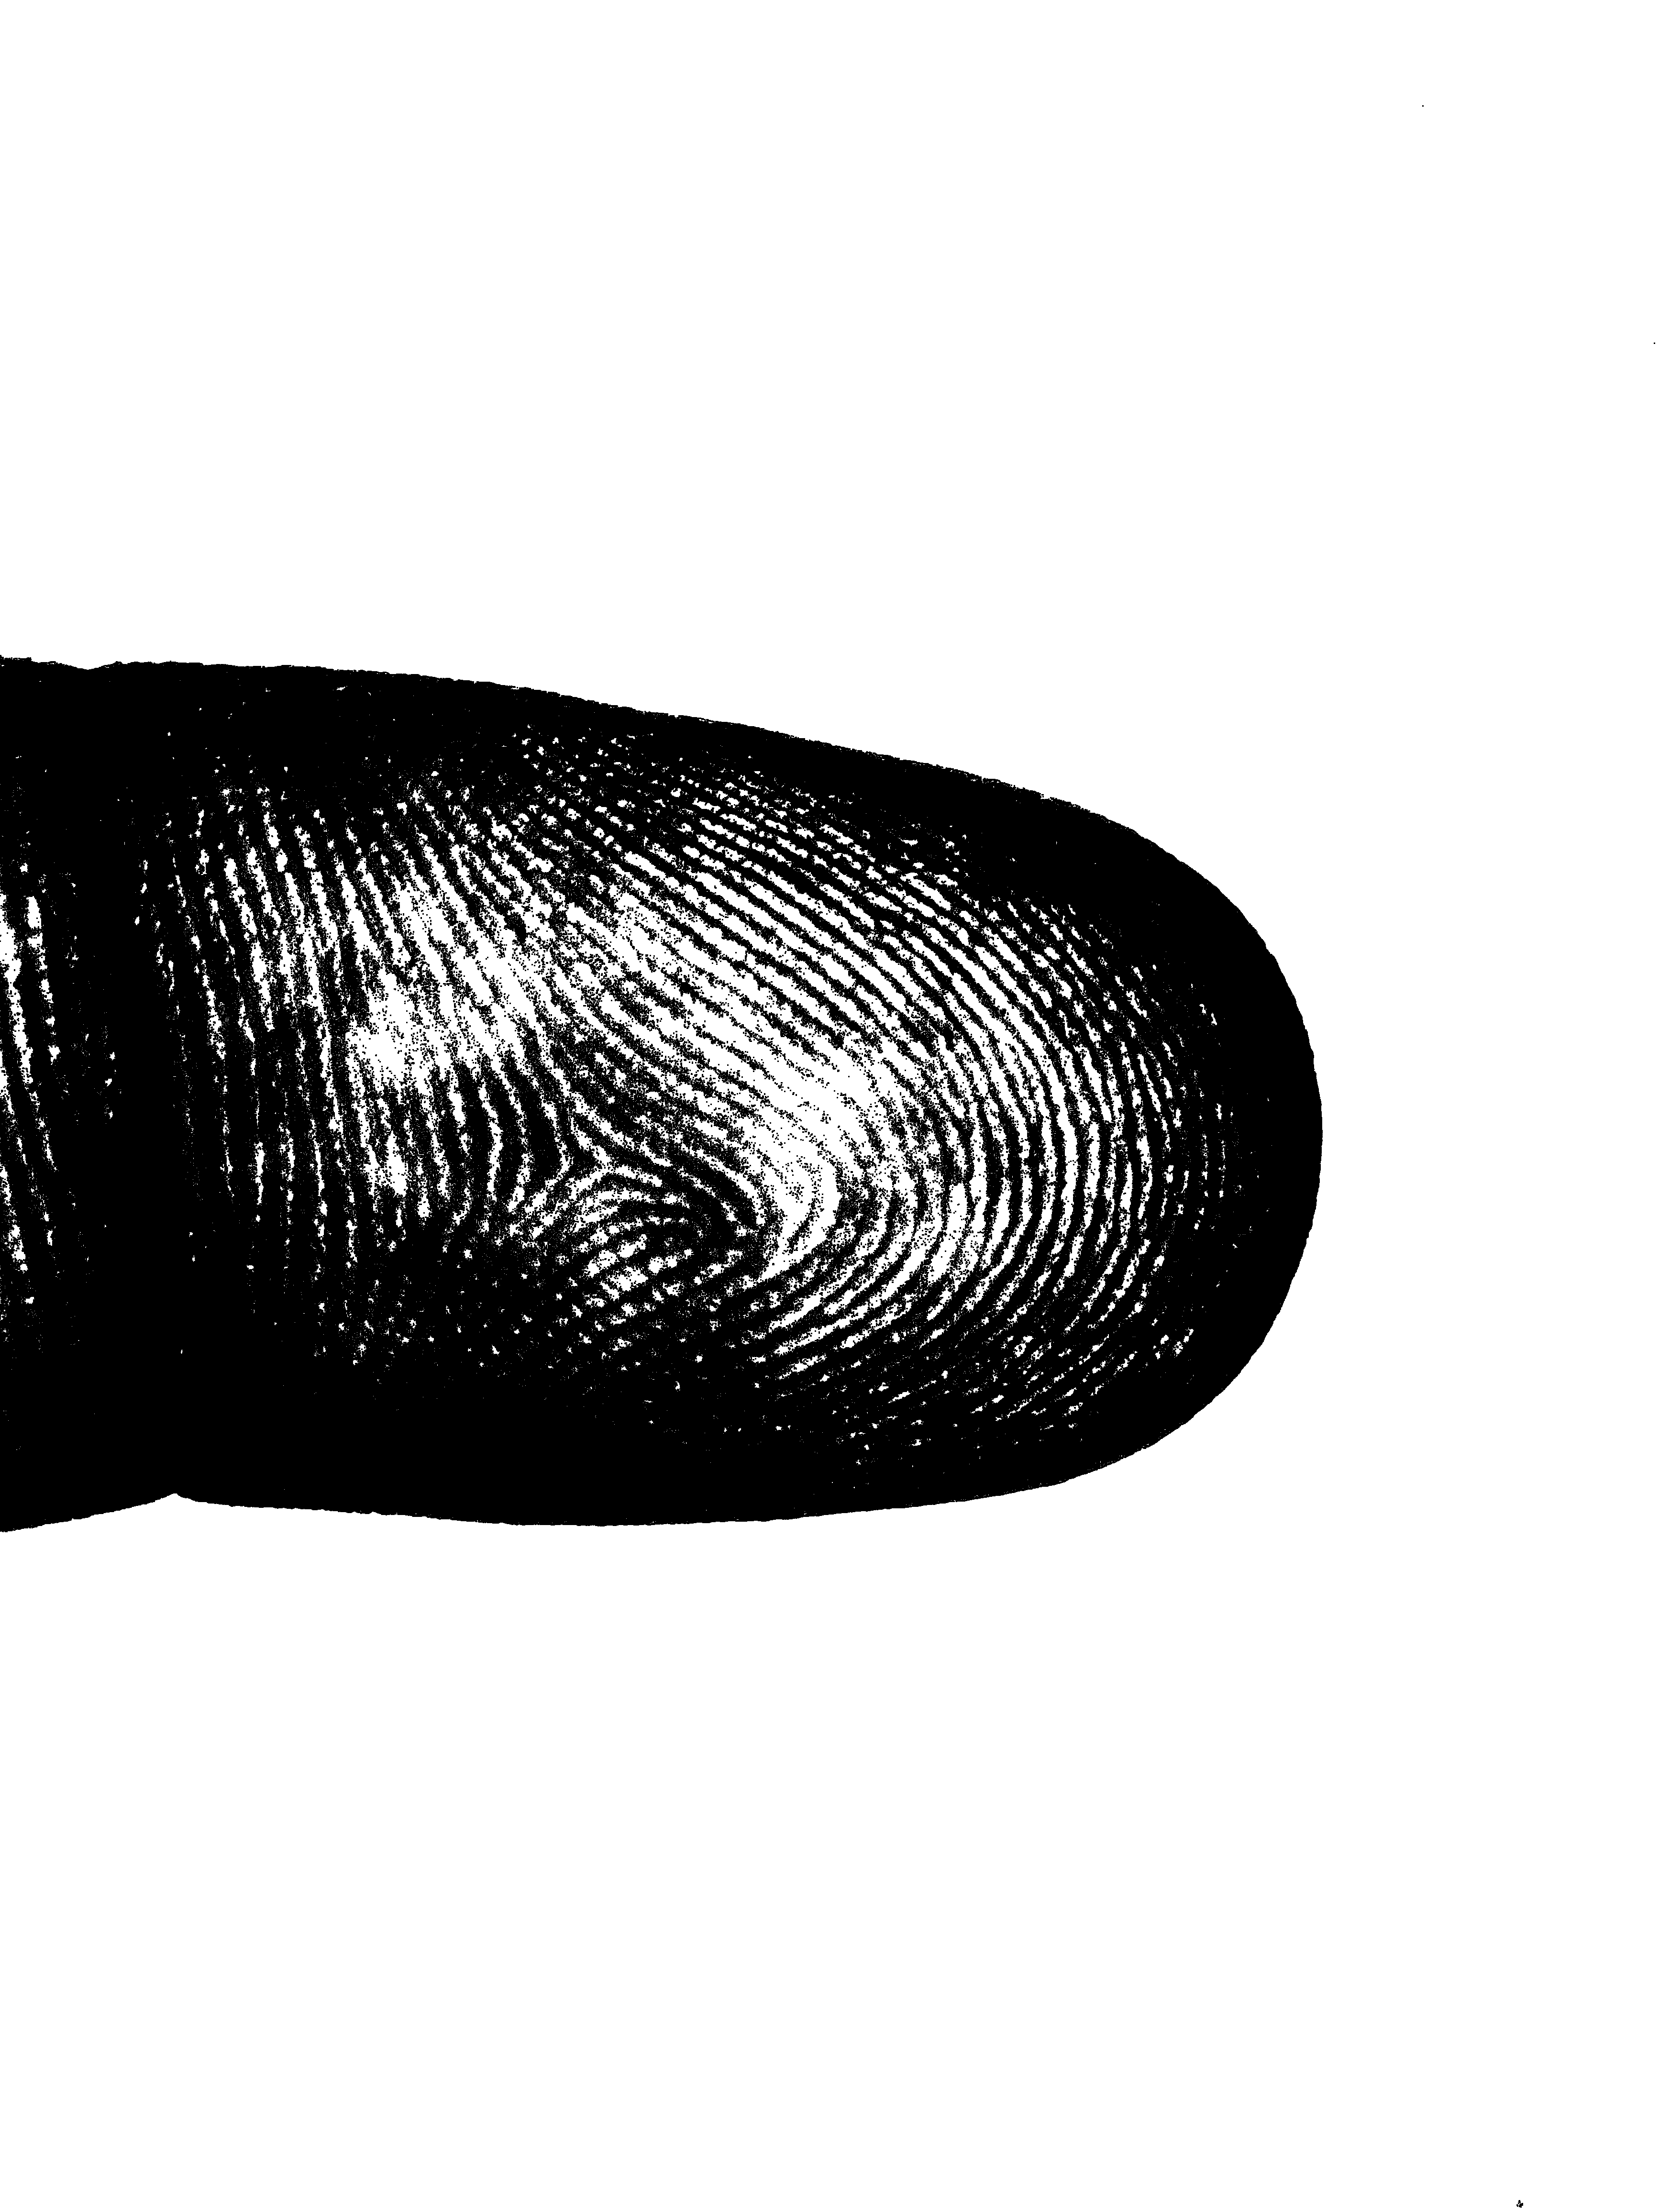

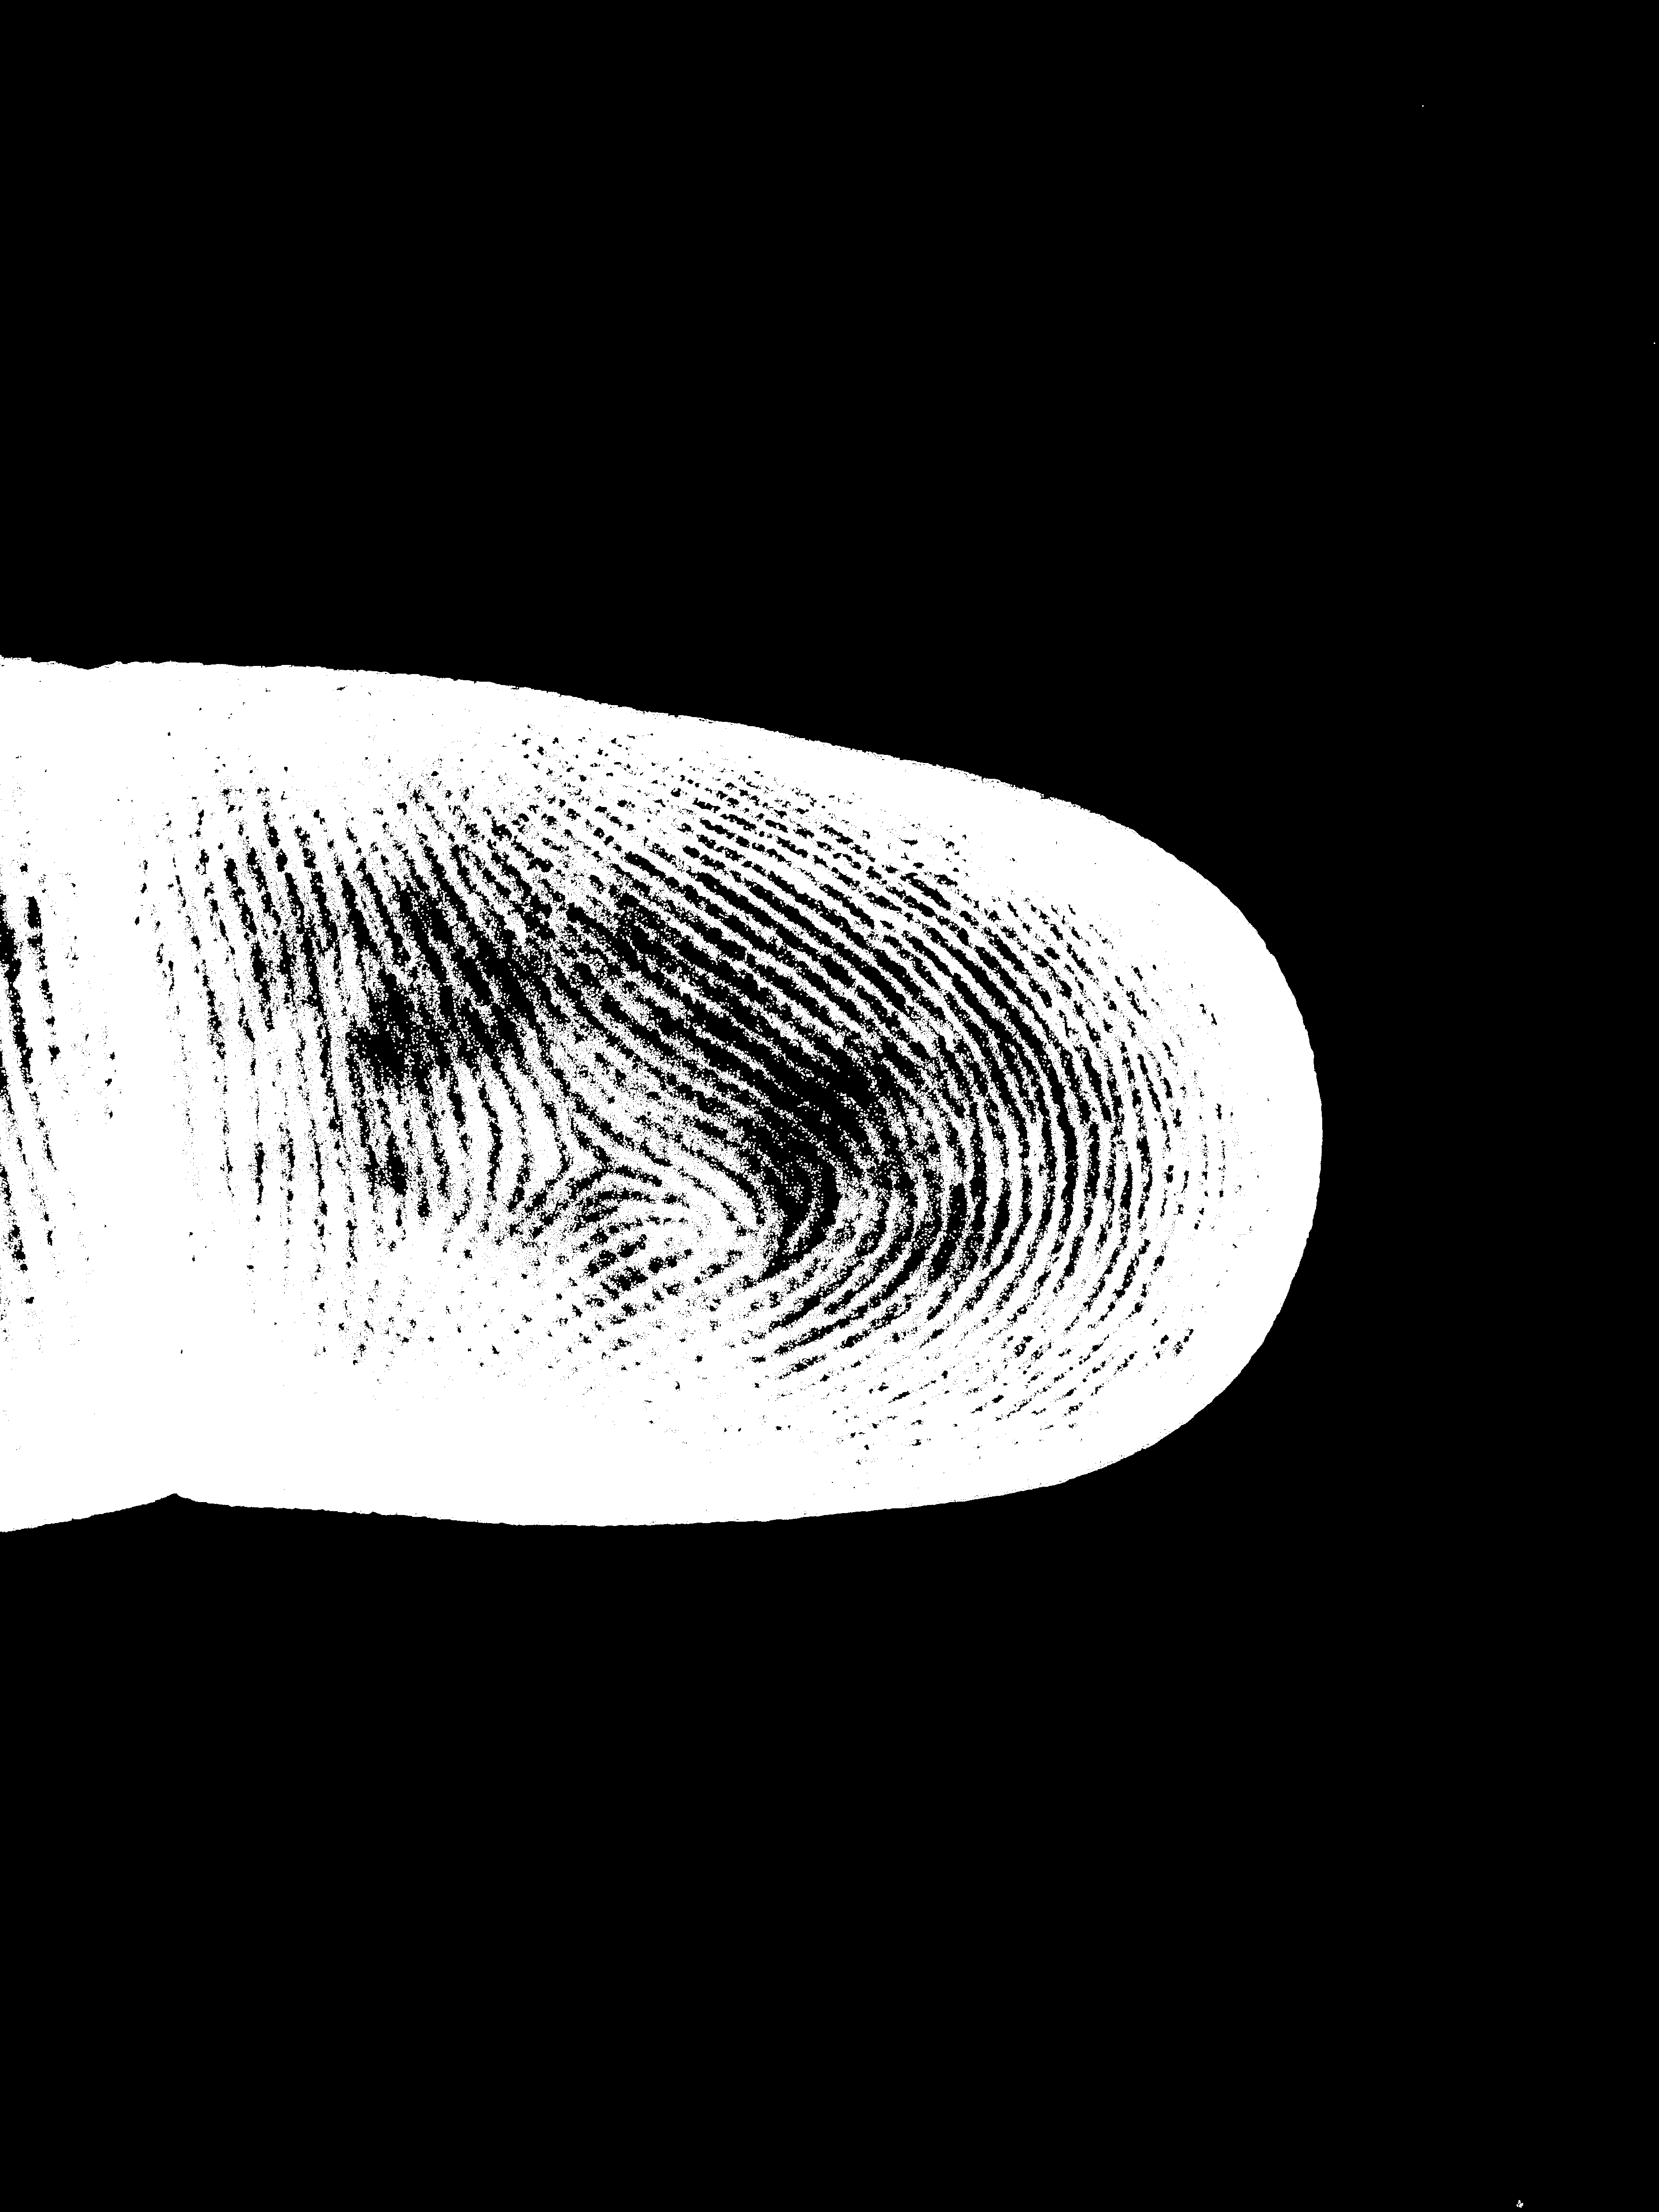

In [ ]:
# prompt: give me above revised code wherein light illumination on object equalized and then further processing is done to extract ridge pattern

import cv2
import numpy as np
from google.colab.patches import cv2_imshow# Visualize the extracted pattern (optional)
#!pip install opencv-python
#!pip install google-colab

def preprocess_fingerprint_jpg(jpg_image):
    """
    Preprocesses a JPEG fingerprint image for potential ridge pattern extraction.

    Args:
        jpg_image (np.ndarray): The JPEG fingerprint image (uint8).

    Returns:
        np.ndarray: The preprocessed image (uint8).
    """

    grayscale_image = cv2.cvtColor(jpg_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Equalize illumination (may be helpful with uneven lighting)
    grayscale_image = cv2.equalizeHist(grayscale_image)

    # Sharpen (may introduce noise, needs experimentation)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    grayscale_image = cv2.filter2D(grayscale_image, cv2.CV_64F, kernel)

    return grayscale_image

def extract_ridge_pattern(grayscale_image):
    """
    Extracts ridge patterns from a preprocessed grayscale fingerprint image (limited accuracy due to JPEG compression).

    Args:
        grayscale_image (np.ndarray): The preprocessed grayscale fingerprint image (uint8).

    Returns:
        np.ndarray: The binary image representing the estimated ridge pattern (uint8).
    """

    # Apply a threshold to separate ridges from valleys (experiment with different thresholds)
    threshold = 65
    binary_image = np.where(grayscale_image > threshold, 255, 0)  # Set ridges to white

    # Morphological closing to remove small isolated dark regions (potential noise)
    kernel = np.ones((3, 3), np.uint8)
    #binary_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    binary_image = cv2.morphologyEx(binary_image.astype(np.uint8), cv2.MORPH_CLOSE, kernel)

    return binary_image

# Load the JPEG fingerprint image
jpg_image = cv2.imread('/content/red.jpg')

# Preprocess the image
grayscale_image = preprocess_fingerprint_jpg(jpg_image)

# Extract the estimated ridge pattern
ridge_pattern = extract_ridge_pattern(grayscale_image)

# Visualize the extracted pattern (optional)
cv2_imshow(ridge_pattern)
cv2.waitKey(0)
cv2.destroyAllWindows()

# prompt: write code to invert ridge pattern output of above code

inverted_ridge_pattern = 255 - ridge_pattern
# Visualize the extracted pattern (optional)
cv2_imshow(inverted_ridge_pattern)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Remember that the accuracy of the extracted pattern might be limited due to JPEG compression.


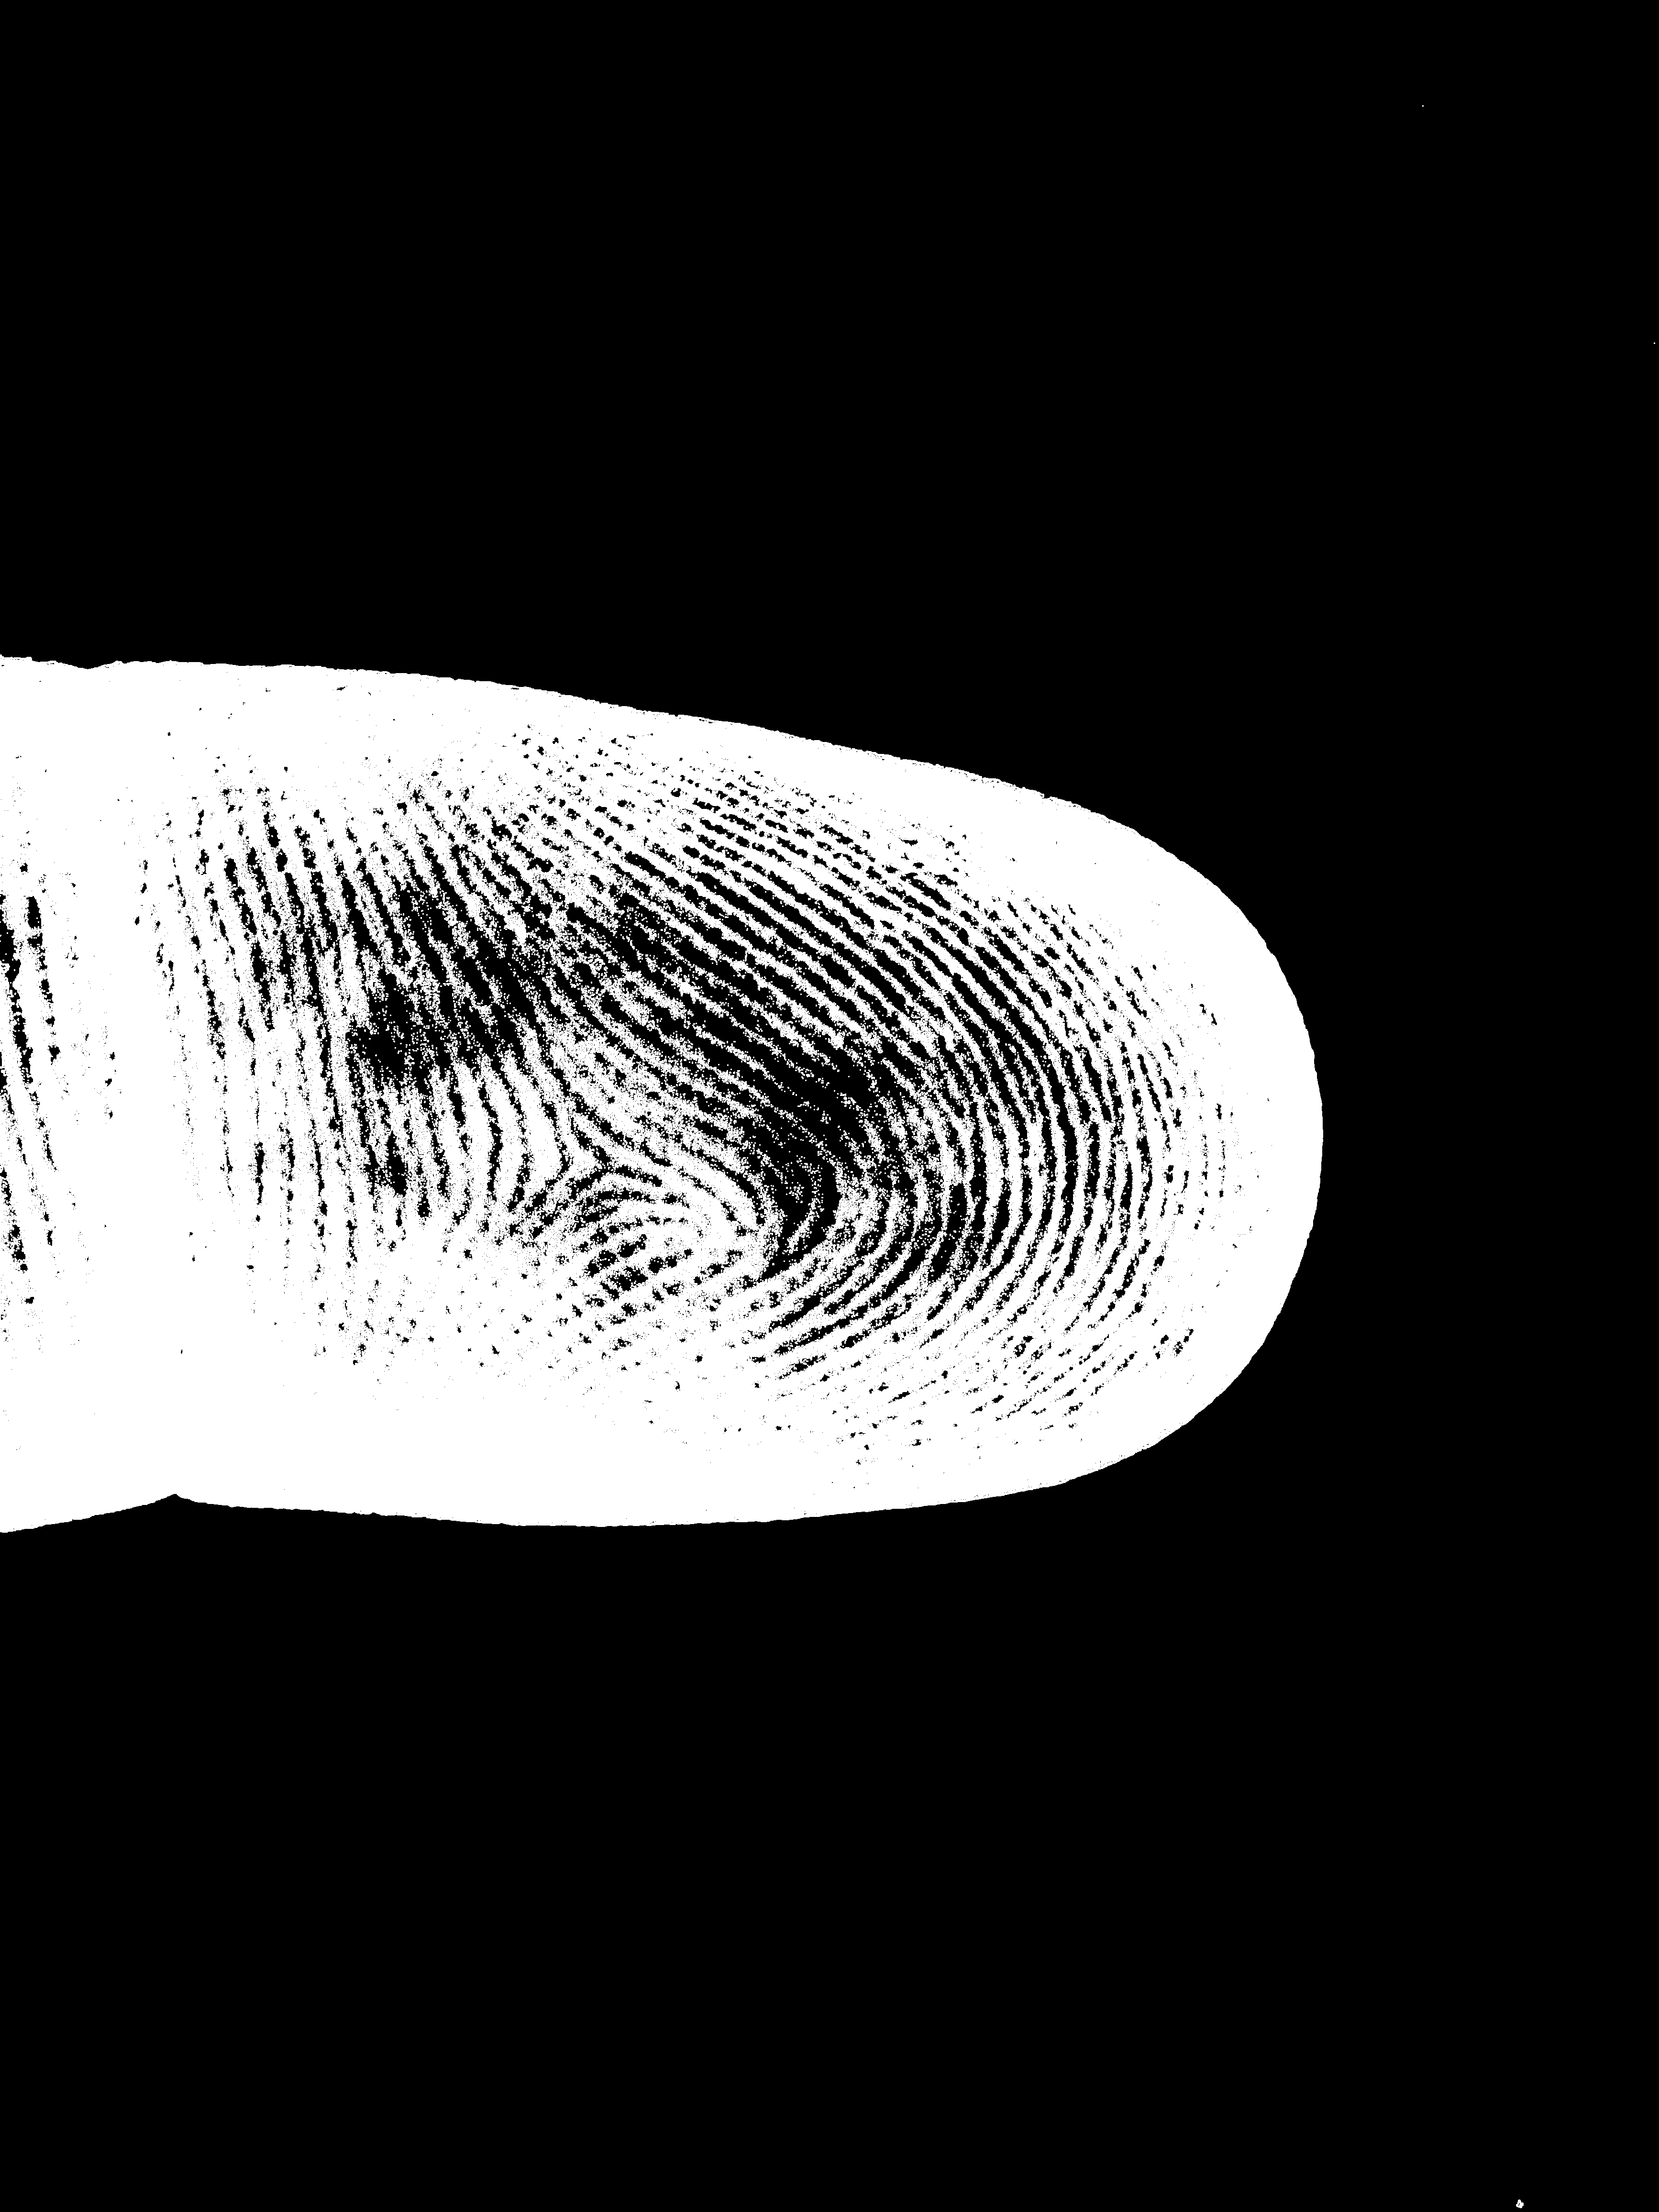

Identified patterns: ['Loop', 'Whorl']


In [ ]:
# prompt: to extract and show finger pattern like delta, whorl, arch and loop from inverted ridge pattern binary image

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def extract_finger_pattern(inverted_ridge_pattern):
  """
  Extracts and labels finger patterns (delta, whorl, arch, loop) from an inverted binary ridge pattern image.

  Args:
    inverted_ridge_pattern (np.ndarray): The inverted binary ridge pattern image (uint8).

  Returns:
    tuple: A tuple containing the labeled finger pattern image (uint8) and a list of identified patterns.
  """

  # Apply a series of morphological operations to enhance patterns
  kernel = np.ones((3, 3), np.uint8)
  processed_image = cv2.morphologyEx(inverted_ridge_pattern, cv2.MORPH_OPEN, kernel)
  processed_image = cv2.morphologyEx(processed_image, cv2.MORPH_CLOSE, kernel)

  # Identify contours in the processed image
  contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize variables for pattern identification
  labeled_image = np.copy(inverted_ridge_pattern)
  identified_patterns = []

  # Analyze each contour to determine its pattern
  for contour in contours:
    area = cv2.contourArea(contour)
    if area < 100:  # Filter out small contours
      continue

    # Calculate solidity and extent for further analysis
    hull = cv2.convexHull(contour)
    solidity = area / cv2.contourArea(hull)
    extent = area / (processed_image.shape[0] * processed_image.shape[1])

    # Classify the pattern based on its characteristics
    if solidity > 0.8 and extent > 0.3:
      pattern = "Delta"
      identified_patterns.append(pattern)
      cv2.drawContours(labeled_image, [contour], 0, (0, 255, 0), 2)
    elif solidity > 0.7 and extent > 0.2:
      pattern = "Whorl"
      identified_patterns.append(pattern)
      cv2.drawContours(labeled_image, [contour], 0, (255, 0, 0), 2)
    elif solidity > 0.6 and extent > 0.1:
      pattern = "Arch"
      identified_patterns.append(pattern)
      cv2.drawContours(labeled_image, [contour], 0, (0, 0, 255), 2)
    else:
      pattern = "Loop"
      identified_patterns.append(pattern)
      cv2.drawContours(labeled_image, [contour], 0, (255, 255, 0), 2)

  return labeled_image, identified_patterns

# Extract and show finger pattern
labeled_image, identified_patterns = extract_finger_pattern(inverted_ridge_pattern)

# Display the labeled image with identified patterns
cv2_imshow(labeled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Print the identified patterns
print("Identified patterns:", identified_patterns)

